In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=load_iris()

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y=pd.DataFrame(data.target,columns=['target'])

In [7]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
## 0->setosa
## 1->versicolor
## 2->virginica

In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

/tmp/ipykernel_3233/2531252424.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


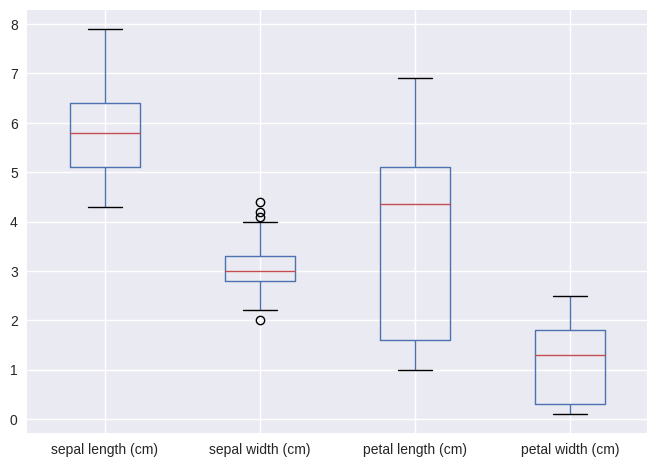

In [10]:
plt.style.use('seaborn')
df.boxplot()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.20,random_state=2)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
encoder=StandardScaler()

In [15]:
x_train_scaled=encoder.fit_transform(x_train)

In [16]:
x_test_scaled=encoder.transform(x_test)

/tmp/ipykernel_3233/3394782874.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


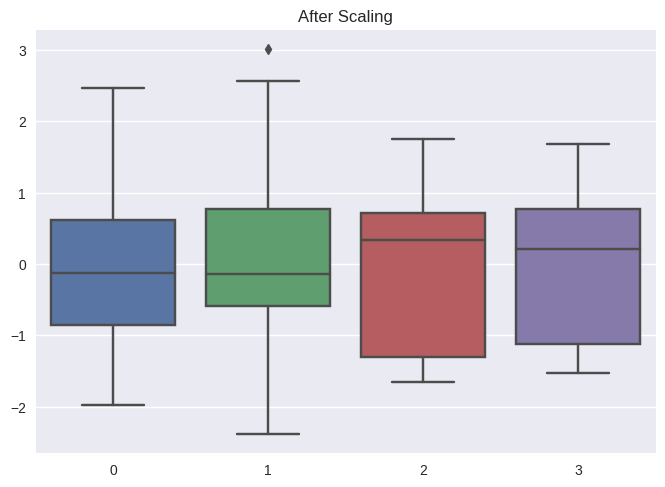

In [17]:
plt.style.use('seaborn')
sns.boxplot(x_train_scaled)
plt.title('After Scaling')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
regressor=LogisticRegression()

In [20]:
regressor.fit(x_train_scaled,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
predict=regressor.predict(x_test_scaled)

In [22]:
from sklearn.metrics import confusion_matrix,r2_score

In [23]:
confusion_matrix(y_test,predict)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]])

In [24]:
r2_score(y_test,predict)

0.951923076923077

In [25]:
predict

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [26]:
list=[' Iris-Setosa','Iris-Versicolour','Iris-Virginica']
prediction_by_name=[]

In [27]:
for i in predict:
    prediction_by_name.append(list[i])

In [30]:
print(prediction_by_name)

[' Iris-Setosa', ' Iris-Setosa', 'Iris-Virginica', ' Iris-Setosa', ' Iris-Setosa', 'Iris-Virginica', ' Iris-Setosa', 'Iris-Virginica', 'Iris-Virginica', ' Iris-Setosa', ' Iris-Setosa', ' Iris-Setosa', ' Iris-Setosa', ' Iris-Setosa', 'Iris-Versicolour', 'Iris-Versicolour', ' Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica', 'Iris-Versicolour', 'Iris-Virginica', 'Iris-Versicolour', 'Iris-Virginica', 'Iris-Versicolour', 'Iris-Versicolour', ' Iris-Setosa', ' Iris-Setosa', 'Iris-Virginica', ' Iris-Setosa', 'Iris-Virginica']


In [29]:
len(predict),len(predictio_b

30